# illustrates the use of the `ensemble` and `analogs` classes

In [1]:
%matplotlib inline

In [2]:
import os 
import sys
import pathlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [4]:
sys.path.insert(0, '../')

In [5]:
from paleopy import ensemble
from paleopy import analogs
from paleopy.plotting import scalar_plot

### determine the current working directory 

In [6]:
cwd = pathlib.Path.cwd() 

In [7]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


#### defines the folder where the JSON files are (datasets, and proxies)

In [8]:
djsons = cwd.parent / 'jsons'

In [9]:
pjsons = djsons / 'proxies'

### defines the name of the directory (contained in djsons / proxies) where the ensemble of proxies is located 

In [10]:
ens_dir_name = 'LIANZSWP'

In [11]:
ens_jsons = pjsons / ens_dir_name

In [12]:
if not ens_jsons.exists(): 
    print(f"ERROR, the directory {ens_jsons} doest not exists")

### List of proxies that constitutes the ensemble 

In [13]:
ls -ltr {ens_jsons}

total 96
-rw-r--r-- 1 nicolasf nicolasf 771 Oct  5 11:03  Rarotonga.json
-rw-r--r-- 1 nicolasf nicolasf 787 Oct  5 11:03  Oroko.json
-rw-r--r-- 1 nicolasf nicolasf 770 Oct  5 11:03  Amedee.json
-rw-r--r-- 1 nicolasf nicolasf 781 Oct  5 11:03  Turnbull.json
-rw-r--r-- 1 nicolasf nicolasf 782 Oct  5 11:03  Temple.json
-rw-r--r-- 1 nicolasf nicolasf 776 Oct  5 11:03  Jollie.json
-rw-r--r-- 1 nicolasf nicolasf 781 Oct  5 11:03  Hopkins.json
-rw-r--r-- 1 nicolasf nicolasf 792 Oct  5 11:03  Greenlaw.json
-rw-r--r-- 1 nicolasf nicolasf 794 Oct  5 11:03  Fraser.json
-rw-r--r-- 1 nicolasf nicolasf 775 Oct  5 11:03  Crow.json
-rw-r--r-- 1 nicolasf nicolasf 778 Oct  5 11:03  Cass.json
-rw-r--r-- 1 nicolasf nicolasf 779 Oct  5 11:03  Caples.json
-rw-r--r-- 1 nicolasf nicolasf 788 Oct  5 11:03  Cameron.json
-rw-r--r-- 1 nicolasf nicolasf 779 Oct  5 11:03  Avoca.json
-rw-r--r-- 1 nicolasf nicolasf 789 Oct  5 11:03  Taramakau.json
-rw-r--r-- 1 nicolasf nicolasf 776 Oct  5 11:03  Pyke.json
-rw-r--r-- 

### instantiates an `ensemble` class, need to pass the season explicitely, so that we can check the consitency between the proxy definitions 

In [14]:
ens = ensemble(pjsons=ens_jsons, season='DJF')

### calculates the analog composite in the ERSST SSTs, uses all repeated years (the default) which 'weights' the composite towards the analog seasons common between the proxies

In [15]:
sst = analogs(ens, 'ersst', 'sst').composite()

/home/nicolasf/mambaforge/envs/PICT_notebooks/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### plots

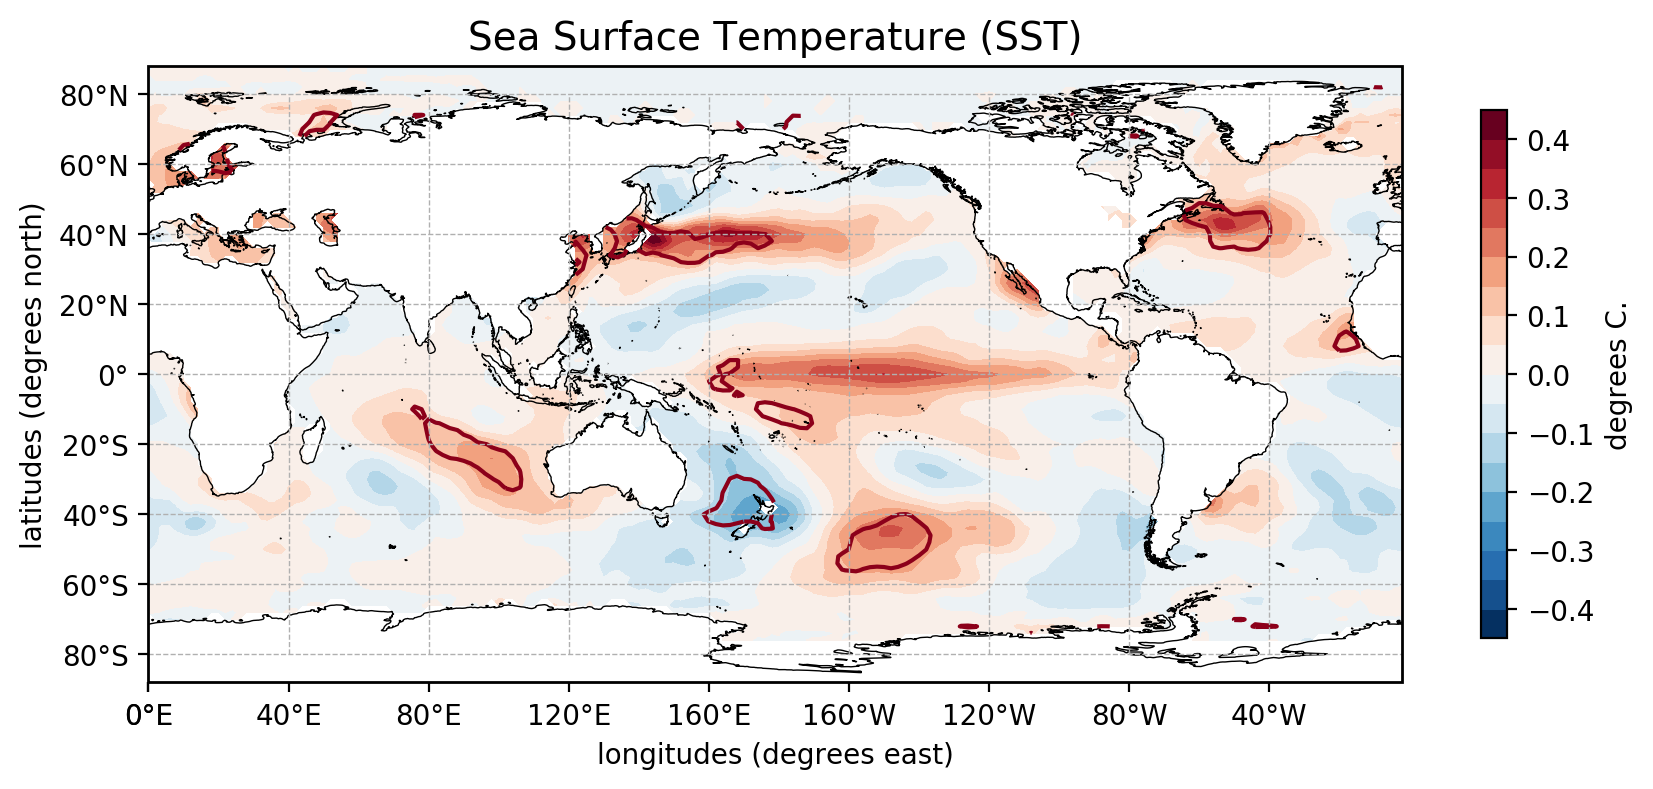

In [16]:
f, ax = scalar_plot(sst).plot()

### same as above but for the NCEP geopotential at 1000 hPa

In [17]:
hgt_1000 = analogs(ens, 'ncep', 'hgt_1000').composite()

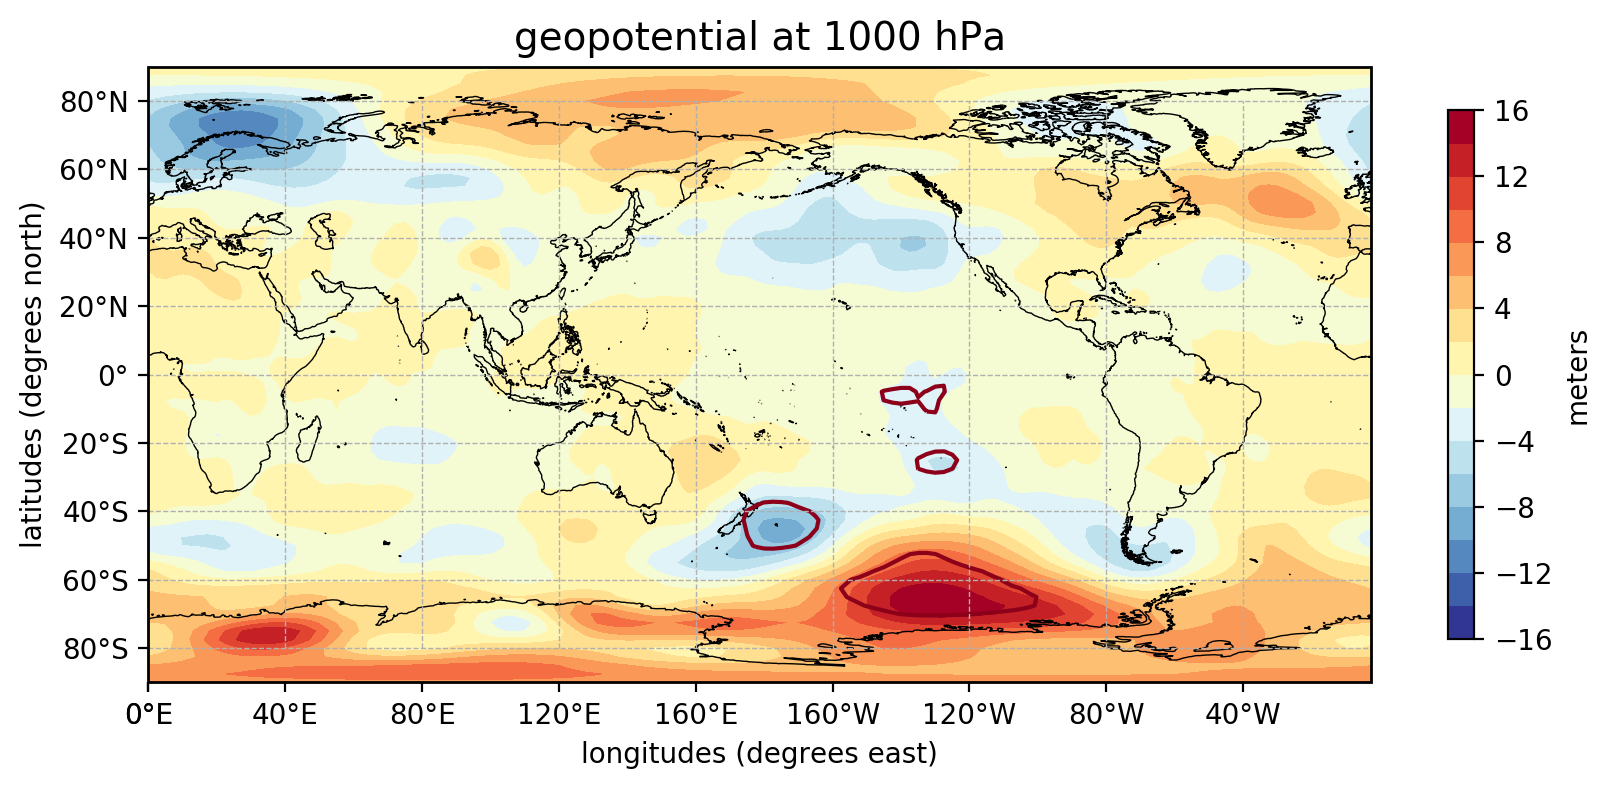

In [18]:
f, ax = scalar_plot(hgt_1000).plot()

### same as above but specifying a south polar stereographic projection, in this case it is advisable to wrap the longitudes 

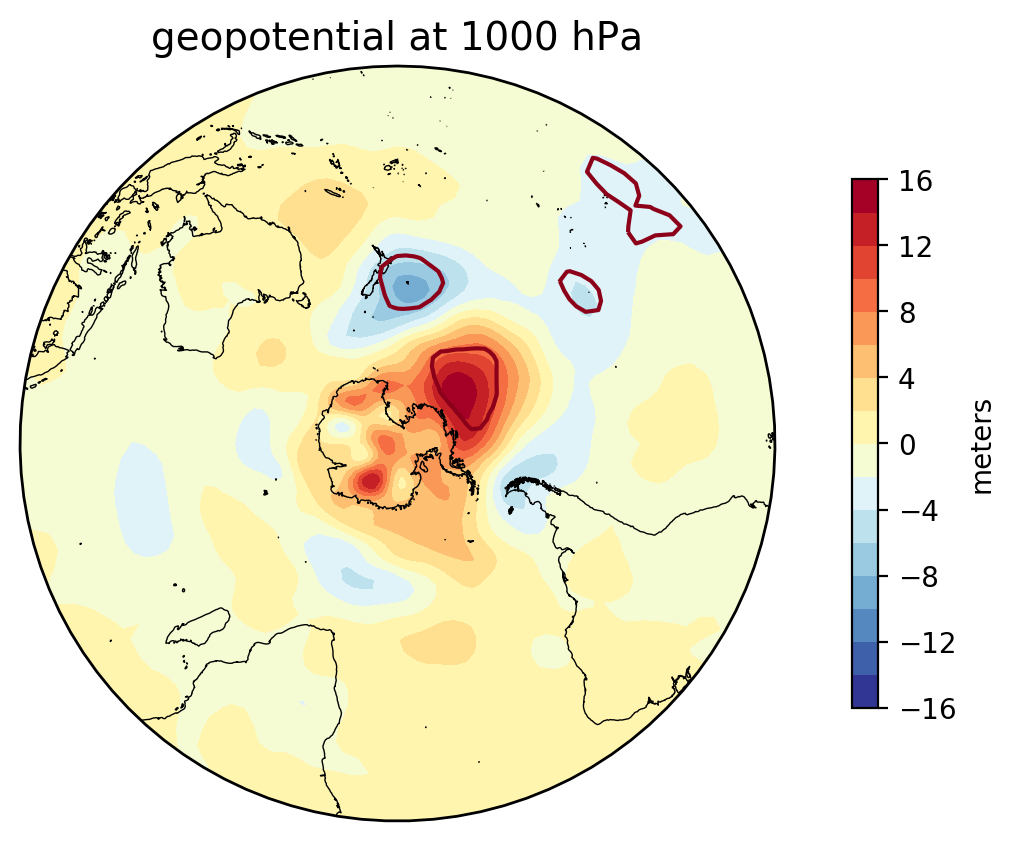

In [19]:
f, ax = scalar_plot(hgt_1000, proj='spstere').plot(wrap_longitudes=True)

### Now in the AWAP Australian Dataset 

In [20]:
awap_tmean = analogs(ens, 'awap', 'TMean').composite()

/home/nicolasf/mambaforge/envs/PICT_notebooks/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


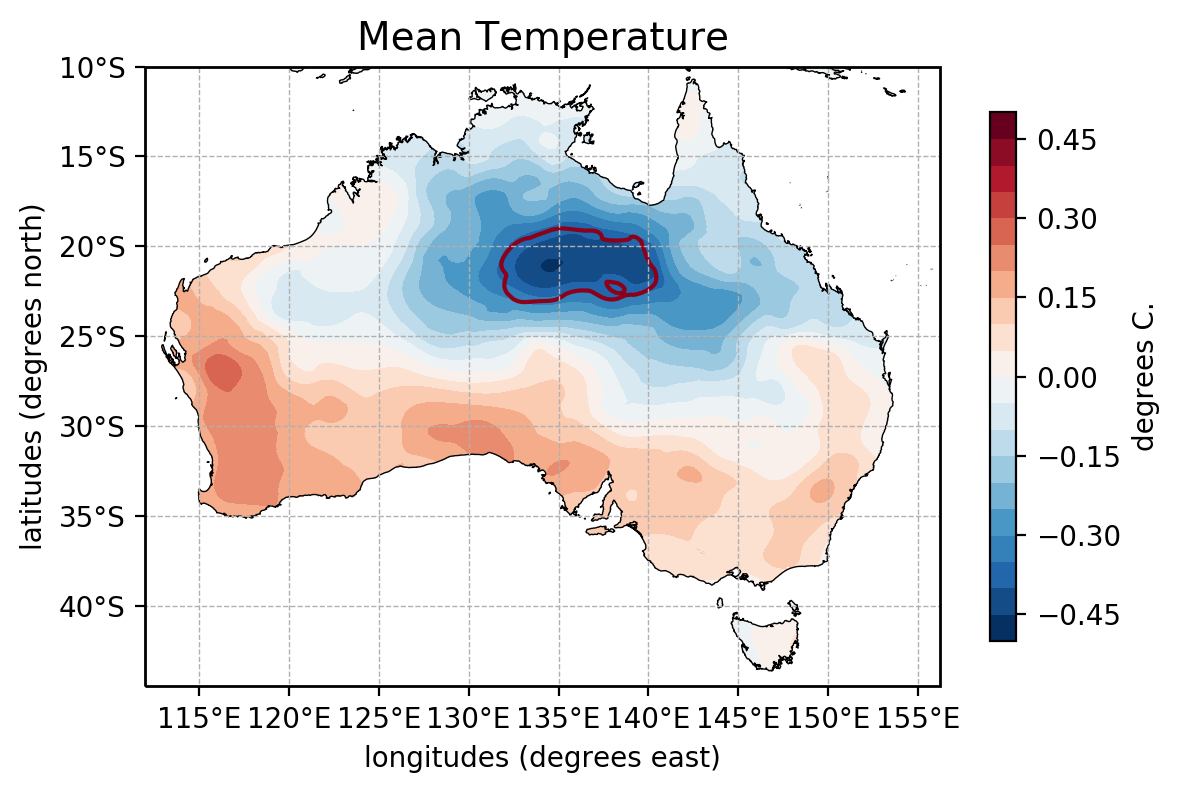

In [21]:
f, ax = scalar_plot(awap_tmean).plot(res='h')

In [22]:
awap_rain = analogs(ens, 'awap', 'Rain').composite()

/home/nicolasf/mambaforge/envs/PICT_notebooks/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


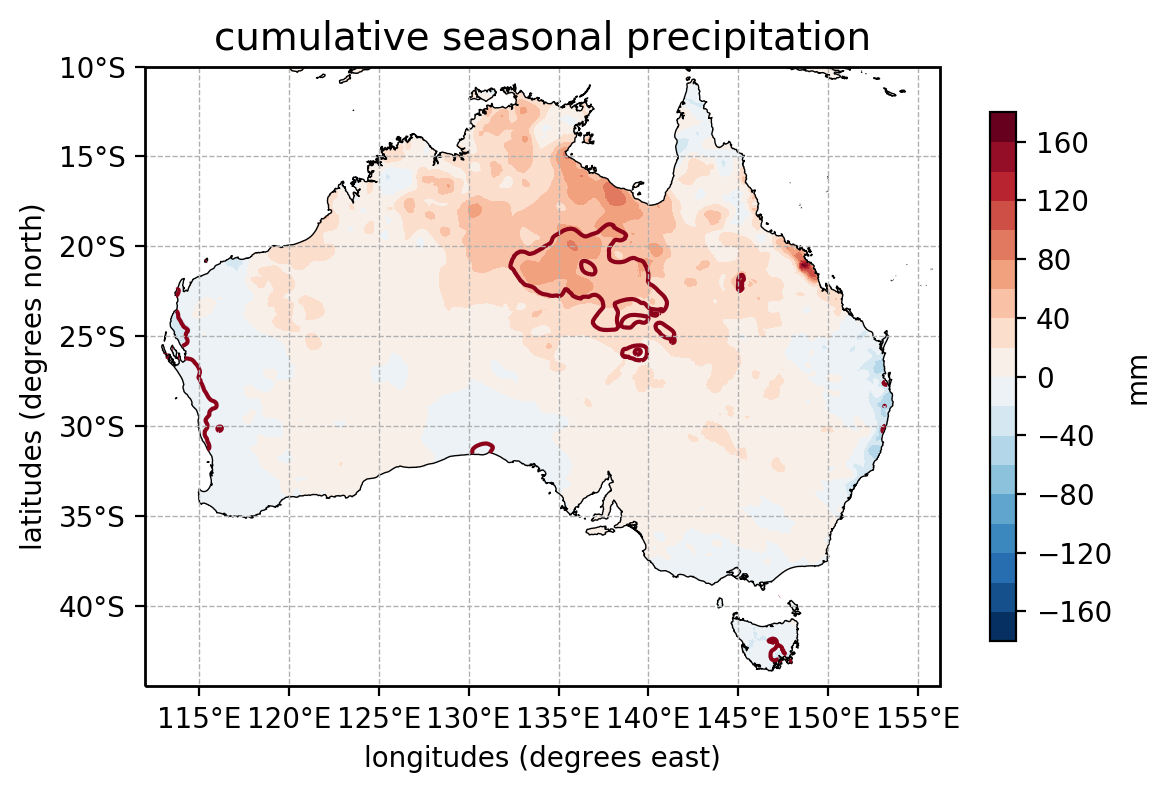

In [23]:
f, ax = scalar_plot(awap_rain).plot(res='h')